<a href="https://colab.research.google.com/github/sarahcodebyte/Evaluating-Classification-Model-Performance/blob/main/ClassificationModelPerformanceEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Dependencies**

In [51]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold


# **Load Dataset**

In [ ]:
dataset = pd.read_csv('/content/Digital AdDataset - Sheet1.csv')
dataset.head()



,Age,Salary,Status
0,50,114793,1
1,35,180352,0
2,21,96328,1
3,75,34961,0
4,46,169833,1


# **Splitting the data into feautures and target**

In [17]:
X = dataset.drop('Status', axis = 1)
Y = dataset['Status']

Y.head()
X.head()

,Age,Salary
0,50,114793
1,35,180352
2,21,96328
3,75,34961
4,46,169833


# **Splitting the data into training and testing data**

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y, random_state = 1)

# **Rescalling the data**

In [21]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Training the model**

In [24]:
model = LogisticRegression(random_state = 0)
model.fit(X_train, Y_train)

LogisticRegression(random_state=0)

# **Accuracy of the model**

In [27]:
#for training data
X_train_prediction = model.predict(X_train)
training_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score: ')
print(training_accuracy*100)

Accuracy score: 
52.67857142857143


In [28]:
#for test data
X_test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score: ')
print(test_accuracy*100)

Accuracy score: 
50.66666666666667


# **Evaluation**

*Confusion Matrix*

Using Confusion Matrix, we will be determining different parameters to check how well the model performs.

The resulting matrix will be 2*2 matrix depicting values of true positive and negative, and false positive and negative. 

Using the matrix result we can calculate the following based on formulas:


*   Sensitivity
*   Misclassification rate

*   Accuracy
*   False positive rate

*   Specificity
*   Precision 

*   Prevelance











In [30]:
cm = confusion_matrix(Y_test, X_test_prediction)
print('Confusion Matrix: ')
print(cm)

Confusion Matrix: 
[[23 16]
 [21 15]]


*Receiver Operating Curve*

no skill: ROC AUC=50.000
logistic skill: ROC AUX=46.724


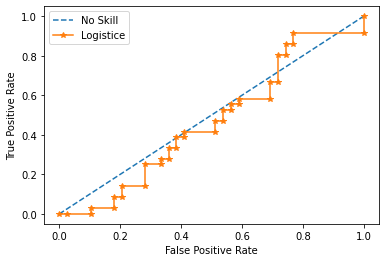

In [60]:
nsProbability = [0 for _ in range(len(Y_test))]
lsProbability = model.predict_proba(X_test)
#keep probablities for the positive outcome only
lsProbablity = lsProbability[:, 1]
#calculate scores
nsAUC = roc_auc_score(Y_test, nsProbability)
lrAUC = roc_auc_score(Y_test, lsProbability[:, 1])

#summarize scores
print('no skill: ROC AUC=%.3F' % (nsAUC*100))
print('logistic skill: ROC AUX=%.3F' % (lrAUC*100))

#calculate roc curves
nsFP, nsTP, _ = roc_curve(Y_test, nsProbability)
lrFP, lrTP, _ = roc_curve(Y_test, lsProbability[:, 1])

#plot the roc curve for the model
plt.plot(nsFP, nsTP, linestyle ='--', label = 'No Skill')
plt.plot(lrFP, lrTP, marker = '*', label = 'Logistice')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#show the legend
plt.legend()
plt.show()

*Cross Validation Score*

In [41]:
kfold = KFold(n_splits = 10)
result = cross_val_score(model, X, Y, cv = kfold)
print('Cross Validation Score: %.2f%%' % (result.mean()*100.0))

Cross Validation Score: 48.13%


*Stratified Cross Validation*

In [54]:
skfold = StratifiedKFold(n_splits = 3)
model_skfold = LogisticRegression()
results_skfold = cross_val_score(model_skfold, X, Y, cv = skfold)
print('Stratified KFold score: ', (results_skfold.mean()*100.0))

Stratified KFold score:  51.50505050505051


*Cumulative Accuracy Profile(CAP) Curve*

36


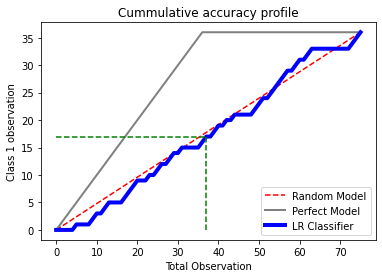

In [46]:
total = len(Y_test)
class_1_count = np.sum(Y_test)
print(class_1_count)
class_0_count = total - class_1_count
plt.plot([0, total], [0, class_1_count], c = 'r', linestyle = '--', label = 'Random Model')

plt.plot([0, class_1_count, total],
         [0, class_1_count, class_1_count],
         c = 'gray', linewidth = 2, label = 'Perfect Model')

probs = model.predict_proba(X_test)
probs = probs[:, 1]
model_y = [Y for _, Y in sorted(zip(probs, Y_test), reverse = True)]
y_values = np.append([0], np.cumsum(model_y))
x_values = np.arange(0, total+1)

plt.plot(x_values,
         y_values,
         c = 'b',
         label = 'LR Classifier',
         linewidth = 4)

index = int((50*total/100))

#50% vertical line from x_axis
plt.plot([index, index], [0, y_values[index]], c = 'g', linestyle = '--')

#horizontal line to y_axis from prediction model
plt.plot([0, index], [y_values[index], y_values[index]], c = 'g', linestyle = '--')

class_1_observed = y_values[index]*100/max(y_values)
plt.xlabel('Total Observation')
plt.ylabel('Class 1 observation')
plt.title('Cummulative accuracy profile')
plt.legend(loc = 'lower right')